<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
trainingData = pd.read_csv("drive/MyDrive/telecom.csv")


In [160]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [161]:
trainingData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Label Encoding

In [162]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = label_encoder.fit_transform(trainingData['phone number'])


# Rename Columns

In [163]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)


# Find Correlation 

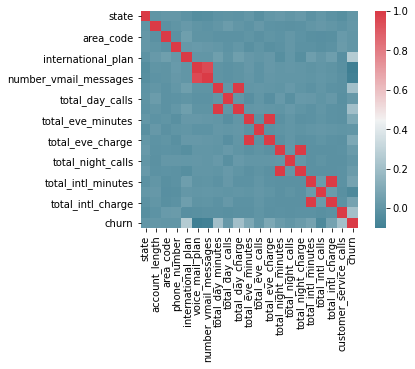

In [164]:
import seaborn as sns
corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [165]:
corr['churn']

state                     0.007780
account_length            0.016541
area_code                 0.006174
phone_number              0.005626
international_plan        0.259852
voice_mail_plan          -0.102148
number_vmail_messages    -0.089728
total_day_minutes         0.205151
total_day_calls           0.018459
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_calls           0.009233
total_eve_charge          0.092786
total_night_minutes       0.035493
total_night_calls         0.006141
total_night_charge        0.035496
total_intl_minutes        0.068239
total_intl_calls         -0.052844
total_intl_charge         0.068259
customer_service_calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

# Find Features Selection

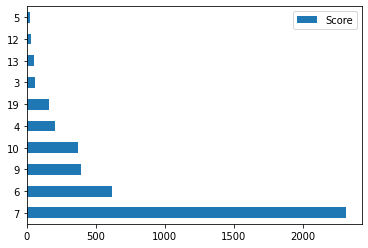

In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
a=trainingData.drop(columns='churn')
b=trainingData['churn']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(a,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').plot(kind='barh')  #print 10 best features
plt.show()

In [167]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(a,b)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()
n=feat_importances.nlargest(20)
print(n)

customer_service_calls    0.118639
total_day_minutes         0.117965
total_day_charge          0.111734
international_plan        0.076000
total_eve_minutes         0.055955
total_eve_charge          0.052374
total_intl_calls          0.048008
total_intl_minutes        0.043467
total_intl_charge         0.040743
total_night_minutes       0.037320
total_night_charge        0.035737
total_day_calls           0.033782
total_night_calls         0.032989
total_eve_calls           0.032973
account_length            0.032686
phone_number              0.031674
state                     0.031608
voice_mail_plan           0.023819
area_code                 0.022918
number_vmail_messages     0.019608
dtype: float64


# DF with Selected feature 

In [168]:
'''DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()'''

"DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})\nprint(DataFeatureSelection.shape)\nDataFeatureSelection.head()"

In [169]:
DataFeatureSelection=trainingData.drop(columns={'total_night_charge','total_day_calls','account_length','total_night_calls','phone_number','state','total_eve_calls','area_code','voice_mail_plan','number_vmail_messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()

(3333, 11)


,international_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,265.1,45.07,197.4,16.78,244.7,10.0,3,2.70,1,0
1,0,161.6,27.47,195.5,16.62,254.4,13.7,3,3.70,1,0
2,0,243.4,41.38,121.2,10.30,162.6,12.2,5,3.29,0,0
3,1,299.4,50.90,61.9,5.26,196.9,6.6,7,1.78,2,0
4,1,166.7,28.34,148.3,12.61,186.9,10.1,3,2.73,3,0


# Find the percent of churn customer to non-churn customer

483
Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



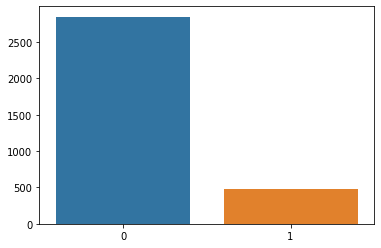

In [170]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print(y_True.shape[0])
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [171]:
trainingData.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [172]:
col=trainingData.columns
print(col)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


In [173]:
churn=trainingData[trainingData['churn']==True]
non_churn=trainingData[trainingData['churn']==False]

international_plan
0.2836438923395445
0.06526315789473684


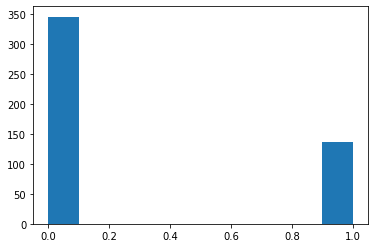

In [174]:
from matplotlib.pyplot import hist
print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])
international_plan_Ch=(churn['international_plan']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['international_plan']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

area_code
437.8178053830228
437.07473684210527


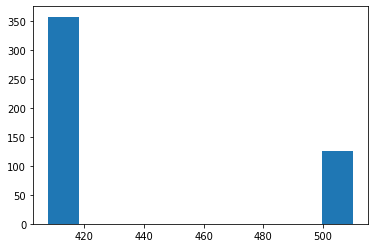

In [175]:
from matplotlib.pyplot import hist
print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])
international_plan_Ch=(churn['area_code']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['area_code']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

**NOTE:** here from above avg for churn and non-churn data we can say "area_code" not important

total_day_minutes
206.91407867494823
175.1757543859649


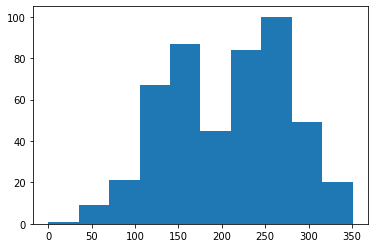

In [176]:
from matplotlib.pyplot import hist
print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_minutes']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_minutes']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

total_day_charge
35.17592132505176
29.780421052631578


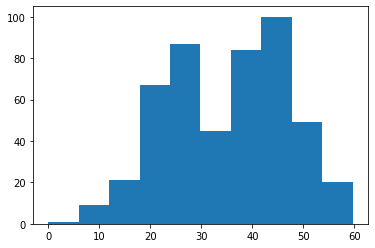

In [177]:
from matplotlib.pyplot import hist
print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_charge']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_charge']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

customer_service_calls
2.229813664596273
1.4498245614035088


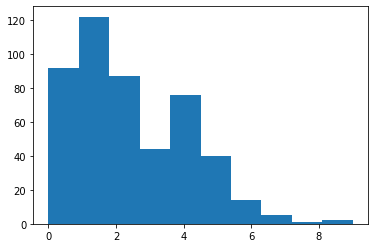

In [178]:
from matplotlib.pyplot import hist
print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])
international_plan_Ch=(churn['customer_service_calls']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['customer_service_calls']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

#Churn percentage


In [179]:
import plotly.express as px
fig = px.pie(trainingData, names='churn', title='churn',width=400, height=400)
fig.show()

**IMPORTANT NOTE :So we need to resample the data**

#Deep Neural Network

In [209]:
%tensorflow_version 2.x

import tensorflow as tf

In [210]:
y=trainingData['churn']
x = trainingData
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
train = x_train.pop('churn')
test = x_test.pop('churn')
print(len(x))
print(len(x_train))
print(len(x_test))

3333
2999
334


In [211]:
x_train.shape

(2999, 20)

In [212]:
x_test.shape

(334, 20)

In [213]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [214]:
my_feature_columns = []
for key in x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='state', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='account_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='area_code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='phone_number', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='international_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='voice_mail_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='number_vmail_messages', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_minutes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_calls', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_charge'

In [215]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    #hidden_units=[256,128,64,32],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpc813l1yj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [187]:
classifier.train(
    input_fn=lambda: input_fn(x_train, train, training=True),steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyawm4wdi/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 10.010676, step = 0
INFO:tensorflow:global_step/sec: 187.904
INFO:tensorflow:loss = 4.487485, step = 100 (0.534 sec)
INFO:tensorflow:global_step/sec: 211.821
INFO:tensorflow:loss = 3.6611874, step = 200 (0.474 sec)
INFO:tensorflow:global_step/sec: 225.733
INFO:tensorflow:loss = 3.029372, step = 300 (0.441 sec)
INFO:tensorflow:global_step/sec: 214.868
INFO:tensorflow:loss = 3.116459, step = 400 (0.468 sec)
INFO:tensorflow:global_step/sec: 221.175
INFO:tensorflow:loss = 2.611801, step = 500 (0.450 sec)
INFO:tenso

In [188]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
deepNeuralNetwork=(eval_result['accuracy']);

# plot_confusion_matrix(lr, x_test, y_test)
# plt.show()


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-21T21:57:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyawm4wdi/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.55177s
INFO:tensorflow:Finished evaluation at 2020-12-21-21:57:52
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.79041916, accuracy_baseline = 0.83532935, auc = 0.68608665, auc_precision_recall = 0.2916358, average_loss = 1.0966477, global_step = 5000, label/mean = 0.16467066, loss = 0.96823287, precision = 0.33333334, prediction/mean = 0.14677341, recall = 0.27272728
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpyawm4wdi/model.ckpt-5000

Test set accuracy: 0.790



# Resample Data using SMOTE

In [285]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = trainingData['churn']
x = trainingData.drop('churn', axis=1)

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
print(x_train.shape[0], y_train.shape[0])
x_train, y_train = sm.fit_sample(x_train, y_train)
print(x_train.shape[0], y_train.shape[0])
z=0
for i in y_train:
  if i ==1:
    z+=1
print(z)

2499 2499
4242 4242
2121


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



# Linear Regression

Linear Regression Success Rate : 84.86%


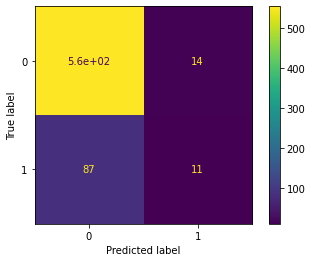

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x = trainingData[['state', 'account_length', 'area_code', 'phone_number','international_plan', 'voice_mail_plan', 'number_vmail_messages','total_day_minutes', 'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls', 'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes', 'total_intl_calls', 'total_intl_charge','customer_service_calls']]
y = trainingData['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
linearRegression=s1;
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

# Gradient Booster Classifier

In [264]:
from sklearn.ensemble import GradientBoostingClassifier
ACC_test_svm = cross_val_score(GradientBoostingClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.95802099 0.95952024 0.94752624 0.93993994 0.95795796]
0.9525930728329529


Gradient Booster Classifier Success Rate : 94.96%


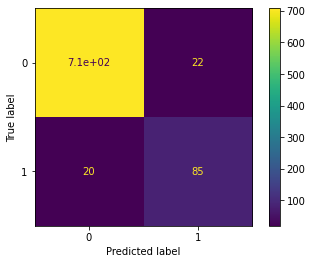

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
gradientBossterClassifier=s2
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

# Random Forest Classifier

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
ACC_test_rf4 = cross_val_score(RandomForestClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)
ACC_test_rf_mean = np.mean(ACC_test_rf4)
print(ACC_test_rf_mean)

[0.93853073 0.95952024 0.96101949 0.95045045 0.94744745]
0.9513936725331028


In [251]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
smote = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)
smote_pred = smote.predict(x_test)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

accuracy_score=  94.60431654676259
pr_score=  94.60431654676259
recall_score=  76.19047619047619
f1_score=  78.04878048780488


accuracy_score=  94.8441247002398
pr_score=  94.8441247002398
recall_score=  76.19047619047619
f1_score=  78.81773399014779

In [231]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
rfc.fit(x_train,y_train)
smote_pred=rfc.predict(x_test)
#s3=accuracy_score(y_test,p3)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)
#randomForestClassifier=s3;
#print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

#plot_confusion_matrix(rfc, x_test, y_test)
#plt.show()

accuracy_score=  94.15292353823088
pr_score=  94.15292353823088
recall_score=  67.3469387755102
f1_score=  77.19298245614034


# Support Vector Machine

In [265]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.85457271 0.85457271 0.85457271 0.85585586 0.85585586]
0.8550859705282494


Support Vector Machine Success Rate : 65.95%


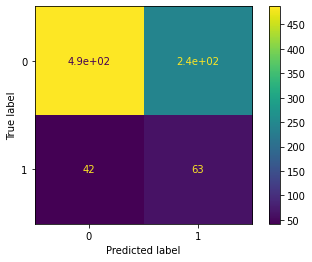

In [222]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
supportVectorMachine=s4;
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

# K Nearest Neighbors

In [274]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
ACC_test_svm = cross_val_score(KNeighborsClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.84857571 0.86206897 0.86356822 0.86786787 0.86336336]
0.8610888249568909


K Nearest Neighbors Top 5 Success Rates:
[78.18, 73.98, 71.58, 68.47, 67.63]


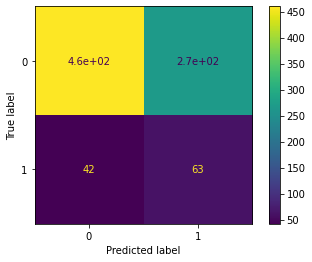

In [223]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
kNearestNeighbours=max(scorelist)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

# Decision Tree Classifier

In [268]:
from sklearn.tree import DecisionTreeClassifier
ACC_test_svm = cross_val_score( DecisionTreeClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.91754123 0.90704648 0.90254873 0.91741742 0.91291291]
0.9114933524228876


Decision Tree Classifier Top 5 Success Rates:
[87.89, 86.81, 86.81, 86.21, 84.29]


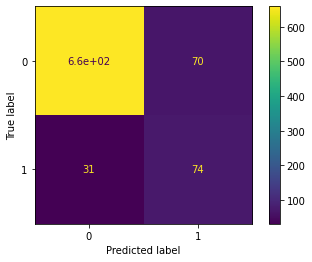

In [224]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
decisionTreeClassifier=max(list1)
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

In [275]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

79.53795379537954
77.93764988009593


# Final Results:

In [225]:
print("Deep Neural Network : ","{:.2f}%".format(100*deepNeuralNetwork))
print("Linear Regression : ","{:.2f}%".format(linearRegression*100))
print("Gradient Booster Classifier :", "{:.2f}%".format(100*gradientBossterClassifier))
print("Random Forest Classifier : ","{:.2f}%".format(randomForestClassifier*100))
print("Support Vector Machine : ","{:.2f}%".format(supportVectorMachine*100))
print("K Nearest Neighbours : ","{:.2f}%".format(kNearestNeighbours))
print("Decision Tree Classifier : ","{:.2f}%".format(decisionTreeClassifier))

Deep Neural Network :  79.04%
Linear Regression :  84.86%
Gradient Booster Classifier : 94.96%
Random Forest Classifier :  94.60%
Support Vector Machine :  65.95%
K Nearest Neighbours :  78.18%
Decision Tree Classifier :  87.89%
